## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Building Linear Regression from Scratch

## Assuming Coefficients and mean

In [2]:
x=2.5*np.random.randn(100)+1.5 # 100 normally distributed random numbers with mean 1.5 and standard deviation 2.5 
res=.5*np.random.randn(100)+0 
ypred=2+.3*x # assume an intercept of 2 and a slope of .3
yact=2+.3*x+res
xlist=x.tolist()
ypredlist=ypred.tolist()
yactlist=yact.tolist()
df=pd.DataFrame({'Input_Variable(X)':xlist,'Predicted_Output(ypred)':ypredlist,'Actual_Output(yact)':yactlist})
df.head()

,Actual_Output(yact),Input_Variable(X),Predicted_Output(ypred)
0,0.837129,-4.025504,0.792349
1,2.483726,0.326322,2.097897
2,1.817710,1.310520,2.393156
3,1.668547,0.152025,2.045607
4,3.832691,4.939265,3.481780


## Plotting both actual and prediction

Text(0.5,1,'Actual vs Predicted')

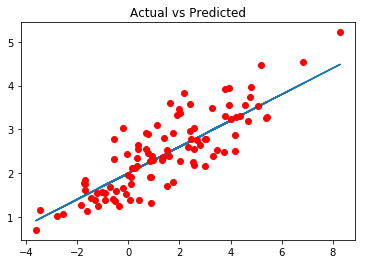

In [3]:
%matplotlib inline
x=2.5*np.random.randn(100)+1.5
res=.5*np.random.randn(100)+0
ypred=2+.3*x
yact=2+.3*x+res
plt.plot(x,ypred)
plt.plot(x,yact,'ro')

plt.title('Actual vs Predicted')

## Adding mean of the actual values for better comparison

Text(0.5,1,'Actual vs Predicted')

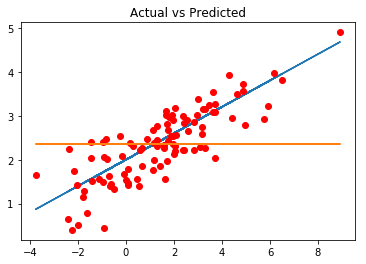

In [4]:
%matplotlib inline
x=2.5*np.random.randn(100)+1.5
res=.5*np.random.randn(100)+0
ypred=2+.3*x
yact=2+.3*x+res
ymean=np.mean(yact)
yavg=[ymean for i in range(1,len(xlist)+1)]
plt.plot(x,ypred)
plt.plot(x,yact,'ro')
plt.plot(x,yavg)
plt.title('Actual vs Predicted')

## R square

In [5]:
df['SSR']=(df['Predicted_Output(ypred)']-ymean)**2
df['SST']=(df['Actual_Output(yact)']-ymean)**2
SSR=df.sum()['SSR'] # Regression Sum of Squares
SST=df.sum()['SST'] # Total Sum of Squares
SSR/SST


0.66273110660311019

## OPTIMUM VALUE OF VARIABLE COEFFICIENTS

In [6]:
xmean=np.mean(df['Input_Variable(X)'])
ymean=np.mean(df['Actual_Output(yact)'])
df['beta']=(df['Input_Variable(X)']-xmean)*(df['Actual_Output(yact)']-ymean)
df['xvar']=(df['Input_Variable(X)']-xmean)**2
betan=df.sum()['beta'] # numerator
betad=df.sum()['xvar'] # denominator
beta=betan/betad

alpha=ymean-(betan/betad)*xmean
beta,alpha

(0.30015297778353095, 1.9440726375808577)

In [7]:
df['ymodel']=beta*df['Input_Variable(X)']+alpha

In [8]:
df.head()

,Actual_Output(yact),Input_Variable(X),Predicted_Output(ypred),SSR,SST,beta,xvar,ymodel
0,0.837129,-4.025504,0.792349,2.429457,2.291867,7.810137,27.800413,0.735806
1,2.483726,0.326322,2.097897,0.064072,0.017611,-0.152234,0.847843,2.042019
2,1.817710,1.310520,2.393156,0.001775,0.284420,-0.031750,0.004021,2.337429
3,1.668547,0.152025,2.045607,0.093277,0.465770,0.711636,1.199203,1.989703
4,3.832691,4.939265,3.481780,1.278616,2.195347,5.591021,13.632039,3.426608


In [9]:
df['SSR']=(df['ymodel']-ymean)**2
df['SST']=(df['Actual_Output(yact)']-ymean)**2
SSR=df.sum()['SSR']
SST=df.sum()['SST']
SSR/SST

0.6636147748725878

Text(0.5,1,'Actual vs Predicted vs Model')

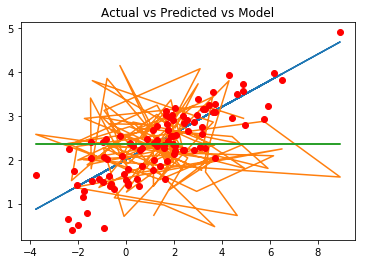

In [10]:
%matplotlib inline
plt.plot(x,ypred)
plt.plot(x,df['ymodel'])
plt.plot(x,yact,'ro')
plt.plot(x,yavg)
plt.title('Actual vs Predicted vs Model')

## RSE for a model can be calculated - Residual Standard Error

In [11]:
df['RSE']=(df['Actual_Output(yact)']-df['ymodel'])**2
RSEd=df.sum()['RSE']
RSE=np.sqrt(RSEd)/98 # n-2
RSE

0.053784416811863148

# Implementing Linear regression with StatsModel Library

#### Dataset contains data about the advertising budget spent on TV, Radio, and Newspapers

In [12]:
advert.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [13]:
import statsmodels.formula.api as smf
model1=smf.ols(formula='Sales~TV',data=advert).fit()
model1.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [14]:
model1.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

### Above show a low P-value hence, it is significant into model

In [15]:
model1.rsquared

0.61187505085007099

### Summary of all parameters

In [16]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 01 May 2018   Prob (F-statistic):           1.47e-42
Time:                        08:30:50   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# predict the values of sales

In [17]:
sales_pred=model1.predict(pd.DataFrame(advert['TV']))
sales_pred

0      17.970775
1       9.147974
2       7.850224
3      14.234395
4      15.627218
5       7.446162
6       9.765950
7      12.746498
8       7.441409
9      16.530414
10     10.174765
11     17.238710
12      8.163966
13     11.667416
14     16.734822
15     16.321253
16     10.255578
17     20.409404
18     10.322129
19     14.034741
20     17.414596
21     18.317792
22      7.660077
23     17.885209
24      9.994126
25     19.529976
26     13.825579
27     18.446141
28     18.859710
29     10.388680
         ...    
170     9.409426
171    14.852371
172     7.964312
173    15.037764
174    17.604742
175    20.195489
176    18.840695
177    15.123330
178    20.185982
179    14.904661
180    14.476831
181    17.419349
182     9.704153
183    20.704131
184    19.097393
185    16.777605
186    13.663955
187    16.116846
188    20.628073
189     7.921529
190     8.910291
191    10.621610
192     7.850224
193    14.961705
194    14.148829
195     8.848493
196    11.510545
197    15.4465

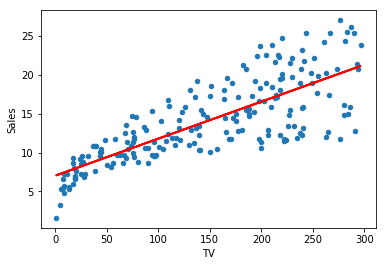

In [18]:
%matplotlib inline
advert.plot(kind='scatter', x='TV', y='Sales')
plt.plot(pd.DataFrame(advert['TV']),sales_pred,c='red',linewidth=2)

### calculate the RSE term for prediction  

In [19]:
advert['sales_pred']=0.047537*advert['TV']+7.03
advert['RSE']=(advert['Sales']-advert['sales_pred'])**2
RSEd=advert.sum()['RSE']
RSE=np.sqrt(RSEd/198)
salesmean=np.mean(advert['Sales'])
error=RSE/salesmean
RSE,salesmean,error

(3.2586573692471279, 14.022500000000001, 0.23238776033140507)

In [20]:
## Multiple linear regression
model2=smf.ols(formula='Sales~TV+Newspaper',data=advert).fit()
model2.params

Intercept    5.774948
TV           0.046901
Newspaper    0.044219
dtype: float64

In [21]:
sales_pred=model2.predict(advert[['TV','Newspaper']])
sales_pred

0      19.626901
1       9.856348
2       9.646055
3      15.467318
4      16.837102
5       9.499445
6       9.510924
7      11.925419
8       6.222518
9      16.083262
10      9.945228
11     16.021516
12      9.805257
13     10.666196
14     17.381579
15     17.278653
16     13.995865
17     21.440393
18      9.829727
19     13.528088
20     18.379490
21     17.948453
22      8.587327
23     17.641044
24      9.506109
25     18.967556
26     13.034296
27     18.048554
28     18.456595
29     10.890326
         ...    
170     8.933646
171    15.586198
172     7.445942
173    14.239121
174    16.785052
175    20.610266
176    18.322864
177    15.314058
178    19.800514
179    14.320051
180    13.486699
181    17.234475
182     9.724113
183    22.438692
184    19.005059
185    16.256398
186    13.493904
187    15.542563
188    19.352307
189     7.686735
190     7.884019
191     9.581306
192     7.978983
193    13.757260
194    13.061376
195     8.176802
196    10.551220
197    14.3594

In [22]:
import numpy as np
advert['sales_pred']=5.77 + 0.046*advert['TV'] + 0.04*advert['Newspaper']
advert['RSE']=(advert['Sales']-advert['sales_pred'])**2
RSEd=advert.sum()['RSE']
RSE=np.sqrt(RSEd/197) # 197 comes from the (n-p-1) 
salesmean=np.mean(advert['Sales'])
error=RSE/salesmean
RSE,salesmean,error

(3.1346969895743846, 14.022500000000001, 0.22354765481008268)

In [23]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     179.6
Date:                Tue, 01 May 2018   Prob (F-statistic):           3.95e-45
Time:                        08:30:52   Log-Likelihood:                -509.89
No. Observations:                 200   AIC:                             1026.
Df Residuals:                     197   BIC:                             1036.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7749      0.525     10.993      0.000       4.739       6.811
TV             0.0469      0.003     18.173      0.000       0.042       0.052
Newspaper      0.0442      0.010      4.346      0.000       0.024       0.064
==============================================================================
Omnibus:                        0.658   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.720   Jarque-Bera (JB):                0.415
Skew:                          -0.093   Prob(JB):                        0.813
Kurtosis:                       3.122   Cond. No.                         410.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Adding newspaper didn't improve the model significantly looking at the adj.R-Squared

# Now adding radio~ to the model instead of the newspaper

In [24]:
import statsmodels.formula.api as smf
model3=smf.ols(formula='Sales~TV+Radio',data=advert).fit()
model3.params

Intercept    2.921100
TV           0.045755
Radio        0.187994
dtype: float64

In [25]:
sales_pred=model3.predict(advert[['TV','Radio']])
sales_pred.head()

0    20.555465
1    12.345362
2    12.337018
3    17.617116
4    13.223908
dtype: float64

In [26]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Tue, 01 May 2018   Prob (F-statistic):           4.83e-98
Time:                        08:30:54   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Thus, we can conclude that radio is a great addition to the model and TV and radio advertising costs have been able to describe the sales very well 

### Now all the predictor variables together

In [27]:
import statsmodels.formula.api as smf
model4=smf.ols(formula='Sales~TV+Radio+Newspaper',data=advert).fit()
model4.params

Intercept    2.938889
TV           0.045765
Radio        0.188530
Newspaper   -0.001037
dtype: float64

In [28]:
sales_pred=model4.predict(advert[['TV','Radio','Newspaper']])
sales_pred

0      20.523974
1      12.337855
2      12.307671
3      17.597830
4      13.188672
5      12.478348
6      11.729760
7      12.122953
8       3.727341
9      12.550849
10      7.032299
11     17.285129
12     10.577121
13      8.826300
14     18.434366
15     20.819300
16     12.823657
17     23.224957
18      9.951682
19     14.166073
20     18.100767
21     14.740538
22      6.489150
23     16.545933
24      8.146519
25     15.610039
26     14.989514
27     17.051673
28     19.410538
29      9.144024
         ...    
170     7.394980
171    14.358274
172     7.607692
173    11.970939
174    13.744357
175    24.786870
176    19.979373
177    12.162046
178    16.010997
179    12.384555
180    10.587200
181    13.928099
182     6.554670
183    24.133100
184    18.538521
185    20.803011
186     9.691373
187    17.076442
188    18.644306
189     6.051624
190    12.489159
191     8.424019
192     4.466230
193    18.486958
194    16.495300
195     5.370342
196     8.165312
197    12.7859

### Way to detect multi-collinearity in statistic called Variance Inflation Factor (VIF). 

In [29]:
model=smf.ols(formula='Newspaper~TV+Radio',data=advert).fit()
rsquared=model.rsquared 
VIF=1/(1-rsquared)
VIF

1.1451873787239286

### Hence, Newspaper is recommended to be dropped from the model

# Model validation

## Training and testing data split

### Through numpy

In [30]:
import numpy as np
a=np.random.randn(len(advert))
check=a<0.8
training=advert[check]
testing=advert[~check]

In [31]:
import statsmodels.formula.api as smf
model5=smf.ols(formula='Sales~TV+Radio',data=training).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     778.8
Date:                Tue, 01 May 2018   Prob (F-statistic):           1.29e-79
Time:                        08:30:56   Log-Likelihood:                -281.72
No. Observations:                 152   AIC:                             569.4
Df Residuals:                     149   BIC:                             578.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.6933      0.318      8.466      0.000       2.065       3.322
TV             0.0466      0.001     32.102      0.000       0.044       0.050
Radio          0.1891      0.009     21.833      0.000       0.172       0.206
==============================================================================
Omnibus:                       13.567   Durbin-Watson:                   2.094
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.761
Skew:                          -0.755   Prob(JB):                     0.000623
Kurtosis:                       3.219   Cond. No.                         435.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
sales_pred=model5.predict(training[['TV','Radio']])
sales_pred

0      20.575619
1      12.201705
2      12.176481
3      17.571138
4      13.169558
5      12.347362
6      11.578795
7      12.007079
8       3.491628
9      12.505014
10      6.873570
11     17.247331
12     10.441794
13      8.678698
14     18.436094
15     20.829325
18      9.798318
20     18.119688
21     14.731738
22      6.316133
28     19.424268
31     11.250484
33     18.865140
35     17.028875
36     23.426965
37     15.520598
39     20.458749
40     16.356730
41     17.266535
42     21.627509
         ...    
163    17.279832
164    10.940425
165    14.274950
166    10.639393
168    17.204334
169    17.959652
170     7.219487
171    14.319385
172     7.408998
173    11.891376
175    24.857970
177    12.107728
179    12.309230
180    10.489883
181    13.906856
183    24.241249
184    18.560574
185    20.785406
186     9.597664
187    17.035362
188    18.663065
189     5.854013
190    12.308898
191     8.257674
192     4.271040
194    16.409159
196     8.014125
197    12.7086

In [33]:
import numpy as np
testing['sales_pred']=2.86 + 0.04*testing['TV'] + 0.17*testing['Radio']
testing['RSE']=(testing['Sales']-testing['sales_pred'])**2
RSEd=testing.sum()['RSE']
RSE=np.sqrt(RSEd/51)
salesmean=np.mean(testing['Sales'])
error=RSE/salesmean
RSE,salesmean,error

C:\Users\asd\Anaconda2\envs\py36\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\asd\Anaconda2\envs\py36\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


(2.4338357324497109, 13.862499999999999, 0.17556975527139485)

# Linear regression with scikit-learn

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
feature_cols = ['TV', 'Radio']
X = advert[feature_cols]
Y = advert['Sales']
trainX,testX,trainY,testY = train_test_split(X,Y, test_size = 0.2)
lm = LinearRegression()
lm.fit(trainX, trainY)

C:\Users\asd\Anaconda2\envs\py36\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [35]:
print (lm.intercept_)
print (lm.coef_)

2.92854292616
[ 0.04492668  0.19254216]


In [38]:
list(zip(feature_cols, lm.coef_))

[('TV', 0.044926679904910206), ('Radio', 0.19254215756082055)]

# value of R2 

In [39]:
lm.score(trainX, trainY)

0.89579226598431316

# Prediction of Model

In [40]:
lm.predict(testX)

array([ 11.50181688,  16.43926641,  13.78475014,  22.26045623,
         7.67920322,   7.8191259 ,  16.17805069,  18.26840685,
        21.94917807,  21.22843567,  10.48646915,  12.0184647 ,
        17.35960649,   9.49937791,  20.78944357,  15.45278227,
        14.68199119,  12.29382269,  17.74214489,  12.73471655,
        10.46467061,  17.03163802,  10.75602764,  19.22727548,
         8.15350627,   8.86463347,  14.14800044,  18.4468332 ,
        11.97869072,  16.50856772,   3.7192509 ,   6.09843195,
        10.76886096,  23.19558009,  11.82720979,   8.72536394,
         9.90435318,  14.56965384,   9.2875863 ,  11.65135794])

# Feature selection with scikit-learn
## Recursive Feature Elimination (RFE)
### Support Vector Regression
#### Using Linear Kernel

In [41]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
feature_cols = ['TV', 'Radio','Newspaper']
X = advert[feature_cols]
Y = advert['Sales']
estimator = SVR(kernel="linear")
selector = RFE(estimator,2,step=1)
selector = selector.fit(X, Y)

## Get the list of selected variables

In [42]:
selector.support_

array([ True,  True, False], dtype=bool)

#### Preceding array suggests that TV and radio have been selected for the model, while the newspaper hasn't been selected